In [1]:
from IPython.display import display, Markdown
markdown_content = """
# Email Classifer using SVM
"""
display(Markdown(markdown_content))


# Email Classifer using SVM


In [2]:
markdown_content = """
## 1.Import library and read file csv
"""
display(Markdown(markdown_content))


## 1.Import library and read file csv


In [10]:
import numpy as np
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import nltk
import string
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import svm
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
import matplotlib.pyplot as plt
ps = PorterStemmer()
df = pd.read_csv('../data/tfidf_output_cleaned.csv')
df_copy = df.copy()
df_copy

,Label,Message,imp_feature
0,0,"Go until jurong point, crazy.. Available only ...",go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",nah think goe usf live around though
...,...,...,...
5155,1,This is the 2nd time we have tried 2 contact u...,2nd time tri 2 contact u pound prize 2 claim e...
5156,0,Will Ì_ b going to esplanade fr home?,b go esplanad fr home
5157,0,"Pity, * was in mood for that. So...any other s...",piti mood suggest
5158,0,The guy did some bitching but I acted like i'd...,guy bitch act like interest buy someth els nex...


In [11]:
markdown_content = """
## 2.Split data into 2 parts to train and test
"""
display(Markdown(markdown_content))


## 2.Split data into 2 parts to train and test


In [12]:
X = df_copy['imp_feature']
y = df_copy['Label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
# Convert a pandas Series to a DataFrame
X_train_series = pd.Series(X_train)
X_train_df = X_train_series.to_frame()


# Tạo RandomOverSampler
oversampler = RandomOverSampler(random_state=42)

# Áp dụng oversampling cho dữ liệu huấn luyện
X_train_resampled, y_train_resampled = oversampler.fit_resample(X_train_df, y_train)
X_train_resampled = X_train_resampled.squeeze()
#X_train_resampled,  y_train_resampled
print(X_train)
num_spam = y_train_resampled[y_train_resampled == 1].shape[0]
num_ham = y_train_resampled[y_train_resampled == 0].shape[0]



2167                                check head drop stuff
3862    hiya u like hlday pic look horribl took mo how...
1424                      sent email address incomm right
326     call germani 1 penc per minut call fix line vi...
604                                 call said choos futur
                              ...                        
4426    weekli tone readi download week new tone inclu...
466                 ok gon na head usf like fifteen minut
3092    moon come color dream star make music sm give ...
3772    u gd lor go shop got stuff u wan 2 watch infer...
860     remind download content alreadi paid goto http...
Name: imp_feature, Length: 3870, dtype: object


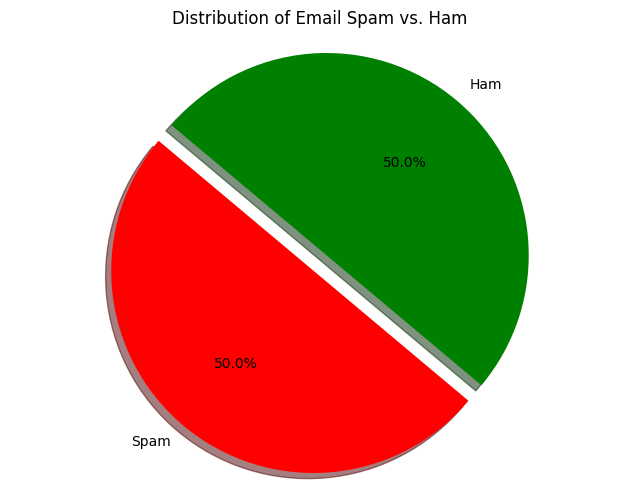

In [13]:
labels = ['Spam', 'Ham']
sizes = [num_spam, num_ham]
colors = ['red', 'green']
explode = (0.1, 0)  # Tách phần Spam ra một chút

# Vẽ biểu đồ tròn
plt.figure(figsize=(8, 6))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')  # Đảm bảo biểu đồ tròn
plt.title('Distribution of Email Spam vs. Ham')
plt.show()

In [14]:
markdown_content = """
## 3.Model
"""
display(Markdown(markdown_content))


## 3.Model


In [15]:
markdown_content = """
### 3.Build Model
"""
display(Markdown(markdown_content))


### 3.Build Model


In [16]:
print(X_train)
print(X_train_resampled)

2167                                check head drop stuff
3862    hiya u like hlday pic look horribl took mo how...
1424                      sent email address incomm right
326     call germani 1 penc per minut call fix line vi...
604                                 call said choos futur
                              ...                        
4426    weekli tone readi download week new tone inclu...
466                 ok gon na head usf like fifteen minut
3092    moon come color dream star make music sm give ...
3772    u gd lor go shop got stuff u wan 2 watch infer...
860     remind download content alreadi paid goto http...
Name: imp_feature, Length: 3870, dtype: object
0                                   check head drop stuff
1       hiya u like hlday pic look horribl took mo how...
2                         sent email address incomm right
3       call germani 1 penc per minut call fix line vi...
4                                   call said choos futur
                         

In [17]:
tfidf = TfidfVectorizer()
feature = tfidf.fit_transform(X_train_resampled)
tuned_parameters = {'kernel':['linear','rbf'],'gamma':[1e-3,1e-4], 'C':[1,10,100,1000]}
model = GridSearchCV(svm.SVC(),tuned_parameters)
model.fit(feature, y_train_resampled)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001],
                         'kernel': ['linear', 'rbf']})

In [18]:
markdown_content = """
### 3.Check spam
"""
display(Markdown(markdown_content))


### 3.Check spam


In [20]:
from sklearn.metrics import precision_score,recall_score,accuracy_score,f1_score,ConfusionMatrixDisplay,confusion_matrix
y_pred_train_def = model.predict(tfidf.transform(X_train_resampled))
y_pred_test_def = model.predict(tfidf.transform(X_test))

print("Train: ", accuracy_score(y_train_resampled, y_pred_train_def))
print("Test: ", accuracy_score(y_test, y_pred_test_def))

Train:  0.9997034400948992
Test:  0.9790697674418605


In [21]:
markdown_content = """
### 4.Get predict and evaluate the model
"""
display(Markdown(markdown_content))


### 4.Get predict and evaluate the model


In [22]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
x_test = tfidf.transform(X_test)
x_pred = model.predict(x_test)

def perform(y_pred):
    print("Precision : ", precision_score(y_test, y_pred))
    print("Recall : ", recall_score(y_test, y_pred))
    print("Accuracy Score : ", accuracy_score(y_test, y_pred))
    print("F1 Score : ", f1_score(y_test, y_pred))

perform(x_pred)

Precision :  0.9571428571428572
Recall :  0.864516129032258
Accuracy Score :  0.9790697674418605
F1 Score :  0.9084745762711864


In [23]:
markdown_content = """
### 4.UI
"""
display(Markdown(markdown_content))


### 4.UI


In [93]:
import pickle
filename = 'finalized_model.sav'
pickle.dump(model, open(filename, 'wb'))

In [94]:
from tkinter import *
import tkinter as tk
import pickle

 
spam_model = pickle.load(open("D:/email-spam/src/source/finalized_model.sav",'rb'))

 
def check_spam():
    text = spam_text_Entry.get()
    is_spam = spam_model.predict(tfidf.transform([text]))
    if is_spam == 1:
        print("text is spam")
        my_string_var.set("Result: text is spam")
    else:
        print("text is not spam")
        my_string_var.set("Result: text is not spam")
win = Tk()
 
win.geometry("400x600")
win.configure(background="cyan")
win.title("Sms Spam Detector")
 
title = Label(win, text="SMS Spam Detector", bg="gray",width="300",height="2",fg="white",font=("Calibri 20 bold italic underline")).pack()
 
spam_text = Label(win, text="Enter your Text: ",bg="cyan", font=("Verdana 12")).place(x=12,y=100)
spam_text_Entry = Entry(win, textvariable=spam_text,width=33)
spam_text_Entry.place(x=155, y=105)
 
my_string_var = StringVar()
my_string_var.set("Result: ")
 
print_spam = Label(win, textvariable=my_string_var,bg="cyan", font=("Verdana 12")).place(x=12,y=200)
 
Button = Button(win, text="Submit",width="12",height="1",activebackground="red",bg="Pink",command=check_spam,font=("Verdana 12")).place(x=12,y=150)
 
win.mainloop()

text is not spam


In [24]:
def func(doc):  # n_jobs in GridSearch does not support lambda function
    return doc

tfidf = TfidfVectorizer() 

tfidf.fit(X_train_resampled)

TfidfVectorizer()

In [98]:
tfidf.vocabulary_


{'check': 1286,
 'head': 2483,
 'drop': 1793,
 'stuff': 4833,
 'hiya': 2539,
 'like': 3045,
 'hlday': 2541,
 'pic': 3843,
 'look': 3099,
 'horribl': 2580,
 'took': 5131,
 'mo': 3356,
 'how': 2592,
 'camp': 1195,
 'amrca': 688,
 'thing': 5044,
 'speak': 4689,
 'soon': 4661,
 'serena': 4434,
 'sent': 4428,
 'email': 1879,
 'address': 589,
 'incomm': 2689,
 'right': 4255,
 'call': 1180,
 'germani': 2294,
 'penc': 3802,
 'per': 3808,
 'minut': 3322,
 'fix': 2117,
 'line': 3051,
 'via': 5358,
 'access': 564,
 'number': 3594,
 '0844': 45,
 '861': 490,
 '85': 484,
 'prepay': 3975,
 'direct': 1696,
 'said': 4328,
 'choos': 1325,
 'futur': 2247,
 'sorri': 4670,
 'din': 1688,
 'lock': 3082,
 'keypad': 2897,
 'pub': 4051,
 'go': 2328,
 'sleep': 4576,
 'tire': 5089,
 'travel': 5171,
 'tessi': 5003,
 'pl': 3863,
 'favor': 2056,
 'convey': 1463,
 'birthday': 996,
 'wish': 5549,
 'nimya': 3539,
 'dnt': 1729,
 'forget': 2169,
 'today': 5108,
 'shija': 4482,
 'lara': 2978,
 'loan': 3078,
 'lt': 3140,
 

In [25]:
X_train_tf = tfidf.transform(X_train_resampled)
X_test_tf = tfidf.transform(X_test)

In [26]:
from sklearn.svm import LinearSVC
from sklearn.metrics import confusion_matrix, accuracy_score

In [27]:
classifier_def  = LinearSVC()  # default C=1.0
classifier_def.fit(X_train_tf, y_train_resampled)

y_pred_train_def = classifier_def.predict(X_train_tf)
y_pred_test_def = classifier_def.predict(X_test_tf)

print("Train: ", accuracy_score(y_train_resampled, y_pred_train_def))
print("Test: ", accuracy_score(y_test, y_pred_test_def))

Train:  0.9995551601423488
Test:  0.9775193798449613


c:\Users\84903\Documents\pytho\ml\venv\Lib\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


In [28]:
from sklearn.model_selection import validation_curve

indices = np.arange(y_train_resampled.shape[0])
param_range=[0.04, 0.05, 0.06, 0.07, 0.08, 0.09 , 0.1]

train_scores, test_scores = validation_curve(LinearSVC(random_state=0), X_train_tf, y_train_resampled,
                                            param_name='C', param_range=param_range, cv=10, scoring='accuracy', n_jobs=-1)

In [129]:
print(train_scores)

[[0.98269896 0.98467622 0.98401714 0.98220465 0.98500824 0.98270181
  0.98171334 0.98369028 0.98434926 0.98286656]
 [0.98928983 0.98533531 0.98698303 0.98780689 0.98747941 0.98550247
  0.98830313 0.98813839 0.98879736 0.98896211]
 [0.99176141 0.99110232 0.98978415 0.99011369 0.98945634 0.99044481
  0.98945634 0.99060956 0.99011532 0.99176277]
 [0.99439776 0.9924205  0.99176141 0.99307958 0.99093904 0.99126853
  0.99192751 0.99242175 0.99291598 0.99489292]
 [0.99604548 0.99340913 0.99423299 0.99588071 0.99341021 0.99439868
  0.99324547 0.99555189 0.99489292 0.99654036]
 [0.99637502 0.99489207 0.99736365 0.99637502 0.99505766 0.99555189
  0.99472817 0.99654036 0.99555189 0.99670511]
 [0.99637502 0.99653979 0.99769319 0.99670456 0.99654036 0.99571664
  0.99571664 0.99736409 0.99555189 0.99769357]]


In [130]:
print(test_scores)

[[0.97481481 0.97185185 0.97777778 0.97777778 0.97329377 0.97774481
  0.97181009 0.98813056 0.98219585 0.98367953]
 [0.97777778 0.97777778 0.98074074 0.9837037  0.97477745 0.98219585
  0.97774481 0.98961424 0.98219585 0.9851632 ]
 [0.97925926 0.98518519 0.9837037  0.98518519 0.97922849 0.98664688
  0.97922849 0.98961424 0.98367953 0.9851632 ]
 [0.98074074 0.98666667 0.98666667 0.98666667 0.98071217 0.98664688
  0.98367953 0.9925816  0.9851632  0.98664688]
 [0.98074074 0.98814815 0.99111111 0.99111111 0.98071217 0.9925816
  0.98813056 0.9925816  0.98664688 0.98813056]
 [0.98222222 0.99259259 0.99407407 0.99111111 0.9851632  0.99554896
  0.99109792 0.99554896 0.98813056 0.98961424]
 [0.98518519 0.99555556 0.99407407 0.99111111 0.99109792 0.99554896
  0.9925816  0.99703264 0.98961424 0.99109792]]


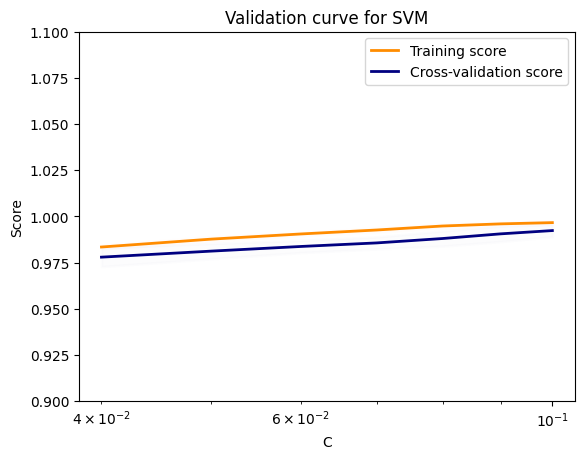

In [29]:
import matplotlib.pyplot as plt
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.title('Validation curve for SVM')
plt.xlabel('C')
plt.ylabel('Score')
plt.ylim(0.9, 1.1)
lw=2
plt.semilogx(
    param_range, train_scores_mean, label="Training score", color="darkorange", lw=lw
)
plt.fill_between(
    param_range,
    train_scores_mean - train_scores_std,
    train_scores_mean + train_scores_std,
    alpha=0.01,
    color="darkorange",
    lw=lw,
)
plt.semilogx(
    param_range, test_scores_mean, label="Cross-validation score", color="navy", lw=lw
)
plt.fill_between(
    param_range,
    test_scores_mean - test_scores_std,
    test_scores_mean + test_scores_std,
    alpha=0.01,
    color="navy",
    lw=lw,
)
plt.legend(loc="best")
plt.show()

In [31]:
from sklearn.model_selection import validation_curve

indices = np.arange(y_train.shape[0])
param_range=[0.2, .3, .4, .5,.6,.7,.8]

train_scores, test_scores = validation_curve(LinearSVC(random_state=0), X_train_tf, y_train_resampled,
                                            param_name='C', param_range=param_range, cv=10, scoring='accuracy', n_jobs=-1)

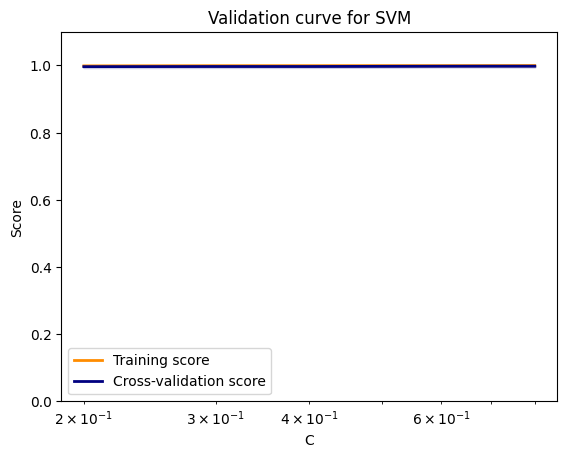

In [32]:
import matplotlib.pyplot as plt
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.title('Validation curve for SVM')
plt.xlabel('C')
plt.ylabel('Score')
plt.ylim(0.0, 1.1)
lw=2
plt.semilogx(
    param_range, train_scores_mean, label="Training score", color="darkorange", lw=lw
)
plt.fill_between(
    param_range,
    train_scores_mean - train_scores_std,
    train_scores_mean + train_scores_std,
    alpha=0.2,
    color="darkorange",
    lw=lw,
)
plt.semilogx(
    param_range, test_scores_mean, label="Cross-validation score", color="navy", lw=lw
)
plt.fill_between(
    param_range,
    test_scores_mean - test_scores_std,
    test_scores_mean + test_scores_std,
    alpha=0.2,
    color="navy",
    lw=lw,
)
plt.legend(loc="best")
plt.show()

In [33]:
clf = LinearSVC(C=.07, random_state=0)
clf.fit(X_train_tf, y_train_resampled)

y_pred_train = clf.predict(X_train_tf)
y_pred_test = clf.predict(X_test_tf)

train_acc = accuracy_score(y_train_resampled, y_pred_train)
test_acc = accuracy_score(y_test, y_pred_test)

print("Train: ", train_acc)
print("Test: ", test_acc)

Train:  0.9936239620403321
Test:  0.9713178294573643


c:\Users\84903\Documents\pytho\ml\venv\Lib\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


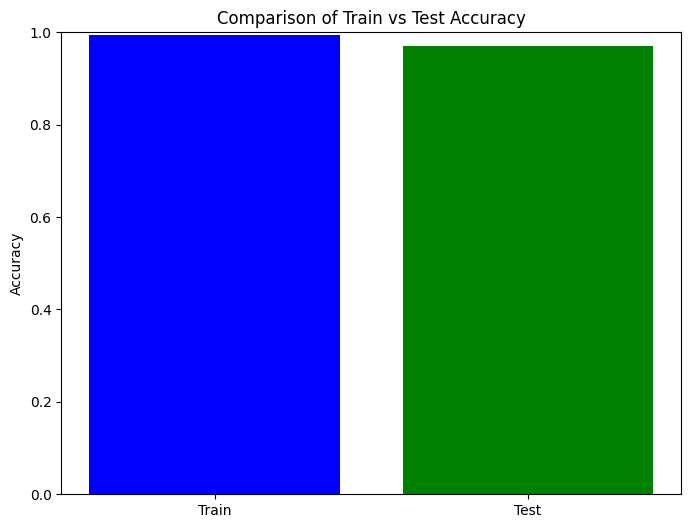

In [34]:
labels = ['Train', 'Test']
accuracies = [train_acc, test_acc]

plt.figure(figsize=(8, 6))
plt.bar(labels, accuracies, color=['blue', 'green'])
plt.ylim(0, 1)  # Đặt giới hạn trục y từ 0 đến 1
plt.ylabel('Accuracy')
plt.title('Comparison of Train vs Test Accuracy')
plt.show()

In [ ]:
S